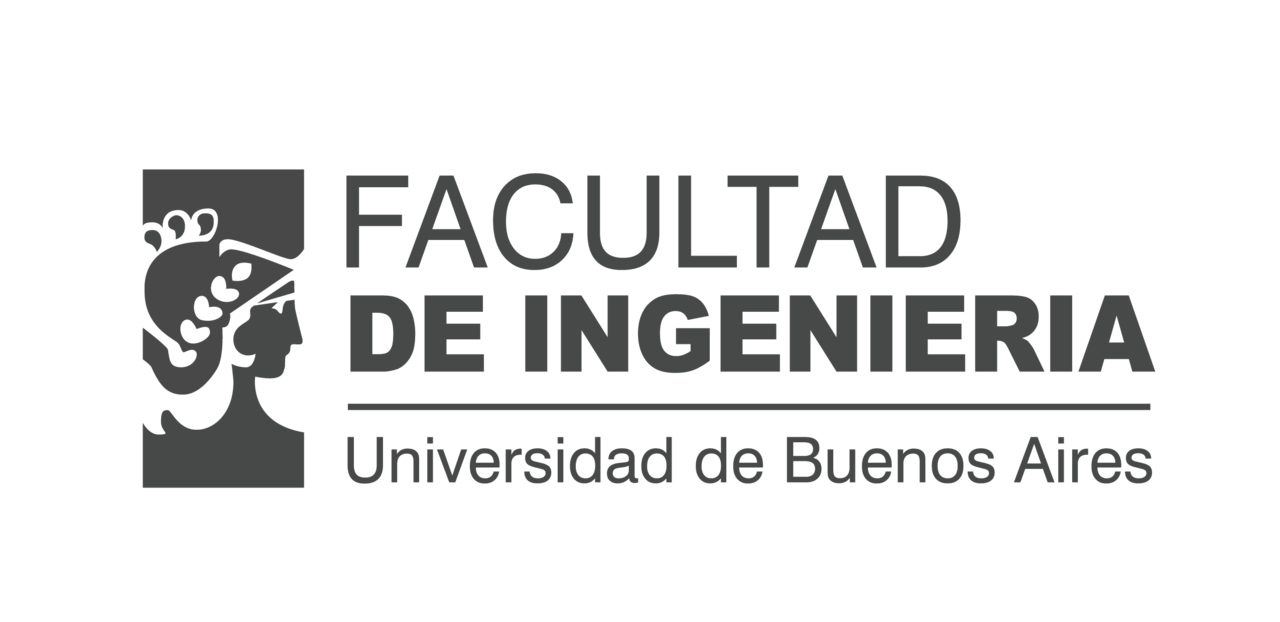

## Aprendizaje Profundo - TP1
### Cohorte 18 - 1er bimestre 2025

**Profesores:** <br />
Dr. Ing. Marcos Maillot - marcos_maillot@yahoo.com.ar <br />
Dr. Antonio Zarauz - hedrergudene@gmail.com <br />
Mg. Ing. Gerardo Vilcamiza - gerardox2000@gmail.com <br />

**Alumnos:** <br />
Mg. Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/joagonzalez/ceia-aprendizaje-profundo <br />

## Consigna

Este primer TP comienza desde el d√≠a despu√©s de la clase 2 (12 de marzo) y la ventana de entrega estar√° abierta hasta las **23hs del lunes 7 de abril (hora de Argentina)**. La resoluci√≥n del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliograf√≠a. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o p√°gina de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizar√° en el siguiente link de google forms: [link](https://forms.gle/ViVSD2CG8TcrZ9wBA)**. Tanto los resultados, como el c√≥digo y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregar√° 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co18.ipynb**
- Los c√≥digos deben poder ejecutarse.
- Los resultados, c√≥mo el c√≥digo, los gr√°ficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atenci√≥n a las consignas, responder las preguntas cuando corresponda.

## **PREGUNTA 1**

### Teoria

#### **Comparaci√≥n de Gradiente Descendente y Adam en una Funci√≥n de Costo No Convexa**

En este ejercicio se comparar√°n los optimizadores Gradiente Descendente (GD) y Adam en la minimizaci√≥n de una funci√≥n de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con activaci√≥n tangente hiperb√≥lica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

Se analizar√° la trayectoria de aprendizaje de ambos algoritmos y se evaluar√° su eficiencia con diferentes tasas de aprendizaje (learning rate).


La funci√≥n de costo utilizada es el Error Cuadr√°tico Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde $w$ y $b$ son los par√°metros a optimizar.


Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitar√° una especie de dataset. Este ser√° sint√©tico y solo de prueba, por ende tendr√°n cierta libertad para elegir sus valores. Sin embargo deber√°n tomar en cuenta que cumpla la siguiente estructura:

x = np.linspace(ini, fin, n)

donde $x$ es un array de una sola dimensi√≥n y con $n$ cantidad de valores. Y tiene un rango de valores desde $ini$ hasta $fin$. Recomiendo que sean los mismos valores solo que con el signo cambiado, por ejemplo $ini=-3 , fin=3$.


Y con un target $y$:

$y = \text{funci√≥n\_no\_lineal}(x) + \text{ruido}$

donde $y$ es tambi√©n un vector de una sola dimensi√≥n de tama√±o $n$ que sigue un patr√≥n no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete $np.random$.


### Dependencias y Clases base

In [223]:
%pip install numpy
%pip install torch
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("üîß Usando dispositivo:", device)

üîß Usando dispositivo: cuda


### 1a) Implementaci√≥n del Gradiente Descendente (1 punto)

#### Consigna

- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar ($J(w, b)$).
- Utilizar 100 √©pocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de ($w$) y ($b$) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la funci√≥n de Costo ($J(w, b)$) VS n√∫mero de √©poca

El optimizador del Gradiente Descendente se debe implementar haciendo el c√≥digo desde cero y paso a paso. Se pueden usar librer√≠as como `numpy`, `scipy`, `matplotlib` o similares. Pero no est√° permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

#### Desarrollo

##### Derivaci√≥n del gradiente con la regla de la cadena

Queremos calcular los gradientes de la funci√≥n de costo respecto a los par√°metros \( w \) y \( b \). Usamos la **regla de la cadena**:

$$
\frac{\partial J}{\partial w} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

Donde:

$$
\frac{\partial z}{\partial w} = x
$$

$$
\frac{\partial \hat{y}}{\partial z} = 1 - \tanh^2(z)
$$

$$
\frac{\partial J}{\partial \hat{y}} = 2(\hat{y} - y)
$$

Entonces:

$$
\frac{\partial J}{\partial w} = 2(\hat{y} - y) \cdot (1 - \tanh^2(z)) \cdot x
$$

Y de forma an√°loga, para el sesgo:

$$
\frac{\partial J}{\partial b} = 2(\hat{y} - y) \cdot (1 - \tanh^2(z))
$$

##### Clases SingleNeuron, Optimizadores y Dataset

In [225]:
class SingleNeuron:
    """Clase para una √∫nica neurona. Version vectorizada, se pasa el dataset completo."""
    def __init__(self):
        self.w = np.random.randn()
        self.b = np.random.randn()

    def activation(self, z):
        """Funci√≥n de activaci√≥n: tanh."""
        return np.tanh(z)

    def activation_derivative(self, z):
        """Derivada de tanh."""
        return 1 - np.tanh(z) ** 2

    def forward(self, x):
        """Propagaci√≥n hacia adelante."""
        z = self.w * x + self.b
        return self.activation(z)

    def compute_loss(self, y_hat, y):
        """C√°lculo del error cuadr√°tico medio."""
        return np.mean((y_hat - y) ** 2)

    def backward(self, x, y):
        """C√°lculo de gradientes de w y b."""
        m = len(x)
        z = self.w * x + self.b
        y_hat = self.activation(z)

        dz = 2 * (y_hat - y) * self.activation_derivative(z)
        # Se devuelven valores medios de los gradientes
        dw = np.mean(dz * x)
        db = np.mean(dz)
        return dw, db

In [226]:
from abc import ABC, abstractmethod

class Optimizer:
    class Optimizer(ABC):
        @abstractmethod
        def __init__(self, *args, **kwargs):
            pass

        @abstractmethod
        def step(self, neuron: SingleNeuron, dw: float, db: float):
            pass

In [227]:
class GradientDescentOptimizer(Optimizer):
    """Optimizador por descenso de gradiente."""
    def __init__(self, lr=0.01):
        self.lr = lr

    def step(self, neuron: SingleNeuron, dw: float, db: float):
        neuron.w -= self.lr * dw
        neuron.b -= self.lr * db

In [228]:
class AdamOptimizer(Optimizer):
    """Optimizador Adam."""
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_w = 0
        self.v_w = 0
        self.m_b = 0
        self.v_b = 0
        self.t = 0

    def step(self, neuron: SingleNeuron, dw: float, db: float):
        self.t += 1

        self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
        self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)
        self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
        self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)

        m_w_corr = self.m_w / (1 - self.beta1 ** self.t)
        v_w_corr = self.v_w / (1 - self.beta2 ** self.t)
        m_b_corr = self.m_b / (1 - self.beta1 ** self.t)
        v_b_corr = self.v_b / (1 - self.beta2 ** self.t)

        neuron.w -= self.lr * m_w_corr / (np.sqrt(v_w_corr) + self.epsilon)
        neuron.b -= self.lr * m_b_corr / (np.sqrt(v_b_corr) + self.epsilon)

In [229]:
def generate_dataset(n: int = 10000, ini: int = -3, fin: int = 3, noise_std: float = 0.1):
    x = np.linspace(ini, fin, n)
    y = np.tanh(x) + np.random.normal(0, noise_std, size=x.shape)
    return x, y

In [230]:
def train(neuron: SingleNeuron, optimizer: Optimizer, x, y, epochs=100, verbose=True):
    """
    Entrenamiento de la neurona, se entrena con el dataset completo en cada epoca ya que x, y son vectores.
    """
    # Inicializar lista de p√©rdidas
    losses = []

    for epoch in range(epochs):
        # Pasada forward
        y_hat = neuron.forward(x)

        # Computar perdida
        loss = neuron.compute_loss(y_hat, y)
        losses.append(loss)

        # Pasada backward
        dw, db = neuron.backward(x, y)

        # Actualizar pesos de la red
        optimizer.step(neuron, dw, db)

        if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
            print(f"Epoch {epoch:3d} | Loss: {loss:.6f} | w: {neuron.w:.4f} | b: {neuron.b:.4f}")

    return losses

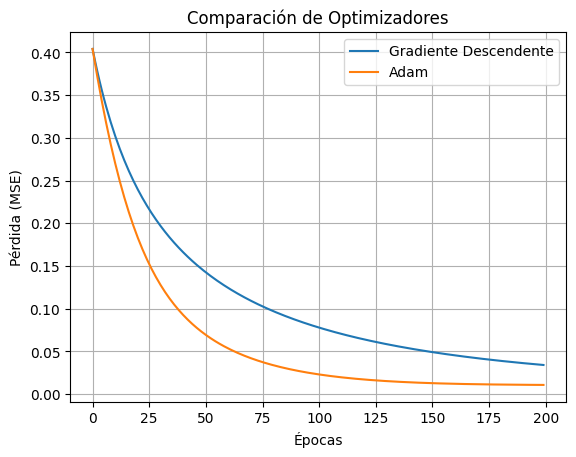

In [231]:
# Generar dataset
x, y = generate_dataset(n=100, ini=-3, fin=3, noise_std=0.1)

# Inicializar neuronas independientes para comparar
neuron_gd = SingleNeuron()
neuron_adam = SingleNeuron()

# Copiar los mismos pesos iniciales para comparaci√≥n justa
neuron_adam.w = neuron_gd.w
neuron_adam.b = neuron_gd.b

# Optimizadores
gd = GradientDescentOptimizer(lr=0.01)
adam = AdamOptimizer(lr=0.01)

# Entrenar
losses_gd = train(neuron_gd, gd, x, y, epochs=200, verbose=False)
losses_adam = train(neuron_adam, adam, x, y, epochs=200, verbose=False)

# Graficar comparaci√≥n
plt.plot(losses_gd, label="Gradiente Descendente")
plt.plot(losses_adam, label="Adam")
plt.xlabel("√âpocas")
plt.ylabel("P√©rdida (MSE)")
plt.title("Comparaci√≥n de Optimizadores")
plt.legend()
plt.grid(True)
plt.show()

Epoch   0 | Loss: 0.184042 | w: 0.3689 | b: -0.0160
Epoch  10 | Loss: 0.028687 | w: 0.6429 | b: -0.0046
Epoch  20 | Loss: 0.017871 | w: 0.7401 | b: -0.0015
Epoch  30 | Loss: 0.014215 | w: 0.7982 | b: -0.0001
Epoch  40 | Loss: 0.012526 | w: 0.8380 | b: 0.0006
Epoch  50 | Loss: 0.011621 | w: 0.8674 | b: 0.0010
Epoch  60 | Loss: 0.011093 | w: 0.8899 | b: 0.0012
Epoch  70 | Loss: 0.010767 | w: 0.9076 | b: 0.0014
Epoch  80 | Loss: 0.010557 | w: 0.9218 | b: 0.0015
Epoch  90 | Loss: 0.010418 | w: 0.9334 | b: 0.0016
Epoch  99 | Loss: 0.010332 | w: 0.9421 | b: 0.0016
Epoch   0 | Loss: 0.873487 | w: 0.2830 | b: 0.9831
Epoch  10 | Loss: 0.556289 | w: 0.4309 | b: 0.8881
Epoch  20 | Loss: 0.368167 | w: 0.5376 | b: 0.8083
Epoch  30 | Loss: 0.267776 | w: 0.6109 | b: 0.7437
Epoch  40 | Loss: 0.207805 | w: 0.6642 | b: 0.6896
Epoch  50 | Loss: 0.168077 | w: 0.7051 | b: 0.6429
Epoch  60 | Loss: 0.139790 | w: 0.7376 | b: 0.6017
Epoch  70 | Loss: 0.118613 | w: 0.7642 | b: 0.5647
Epoch  80 | Loss: 0.102176 

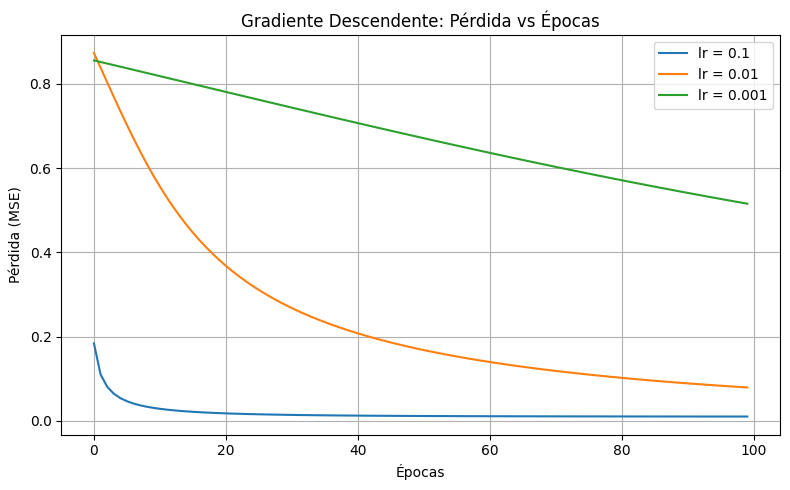

In [241]:
# Dataset sint√©tico
x, y = generate_dataset(n=10000, ini=-3, fin=3, noise_std=0.1)

# Learning rates a probar
learning_rates = [0.1, 0.01, 0.001]
loss_histories = []

for lr in learning_rates:
    # Inicializar neurona con w y b aleatorios
    neuron = SingleNeuron()  # Esto genera nuevos w y b
    optimizer = GradientDescentOptimizer(lr=lr)

    # Entrenar 100 √©pocas
    losses = train(neuron, optimizer, x, y, epochs=100, verbose=True)

    loss_histories.append((lr, losses))

# Graficar resultados
plt.figure(figsize=(8, 5))

for lr, losses in loss_histories:
    plt.plot(losses, label=f"lr = {lr}")

plt.xlabel("√âpocas")
plt.ylabel("P√©rdida (MSE)")
plt.title("Gradiente Descendente: P√©rdida vs √âpocas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1b) Implementaci√≥n de Adam (1.5 puntos)

#### Consigna

- Implementar el algoritmo de Adam para minimizar ($J(w, b)$).  
- Utilizar 100 √©pocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de ($w$) y ($b$) que se usaron para GD para cada diferente learning rate.
- Graficar la funci√≥n de Costo ($J(w, b)$) VS n√∫mero de √©poca
- Comparar el resultado y rendimiento de Adam VS GD para cada learning rate.

Al igual que para GD, el optimizador Adam tambi√©n se debe implementar desde cero y paso a paso. Se pueden usar librer√≠as como `numpy`, `scipy`, `matplotlib` o similares. Pero no est√° permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

#### Desarrollo


 Comparando GD vs Adam con learning rate = 0.1


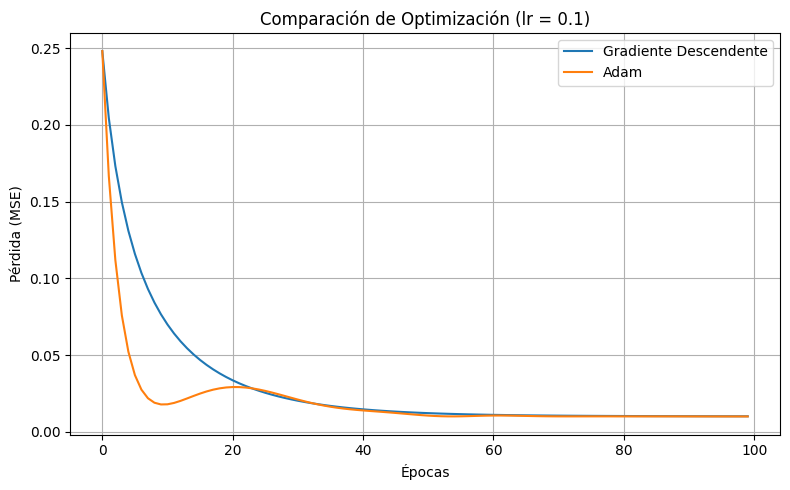


 Comparando GD vs Adam con learning rate = 0.01


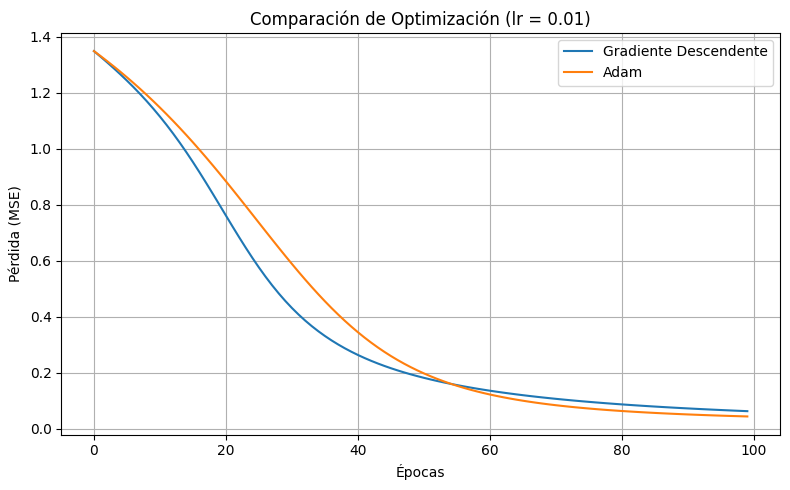


 Comparando GD vs Adam con learning rate = 0.001


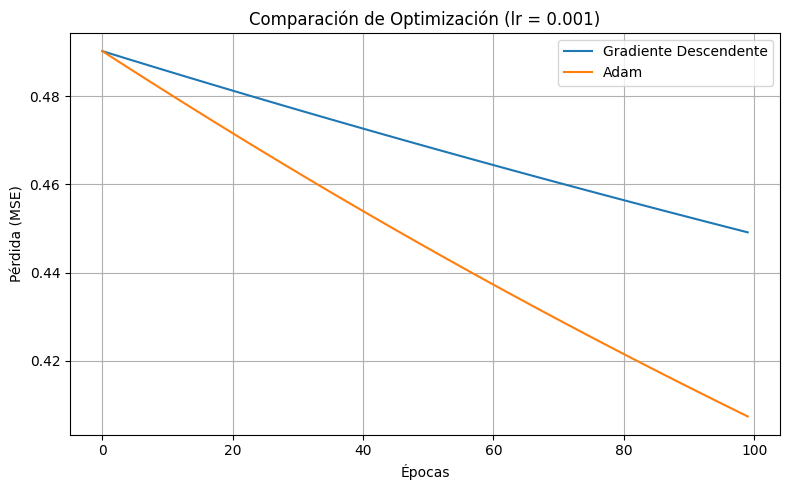

In [248]:
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    print(f"\n Comparando GD vs Adam con learning rate = {lr}")

    # Inicializar neurona y guardar pesos
    neuron_gd = SingleNeuron()
    w_init = neuron_gd.w
    b_init = neuron_gd.b

    # Entrenar con GD
    optimizer_gd = GradientDescentOptimizer(lr=lr)
    losses_gd = train(neuron_gd, optimizer_gd, x, y, epochs=100, verbose=False)

    # Inicializar neurona Adam con mismos pesos
    neuron_adam = SingleNeuron()
    neuron_adam.w = w_init
    neuron_adam.b = b_init

    # Entrenar con Adam
    optimizer_adam = AdamOptimizer(lr=lr)
    losses_adam = train(neuron_adam, optimizer_adam, x, y, epochs=100, verbose=False)

    # Graficar comparaci√≥n
    plt.figure(figsize=(8, 5))
    plt.plot(losses_gd, label="Gradiente Descendente")
    plt.plot(losses_adam, label="Adam")
    plt.title(f"Comparaci√≥n de Optimizaci√≥n (lr = {lr})")
    plt.xlabel("√âpocas")
    plt.ylabel("P√©rdida (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 1c) Visualizaci√≥n en 3D de la trayectoria de aprendizaje (0.5 puntos)

#### Consigna

- Graficar en 3D la trayectoria del aprendizaje de ambos optimizadores sobre la superficie de la funci√≥n de costo ($J(w, b)$). Se debe elegir un solo learning rate.
- Comparar c√≥mo se mueven en el espacio de par√°metros y qu√© diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elecci√≥n de funciones a usar para lograr el gr√°fico.

#### Desarrollo

Buscamos una representaci√≥n como la siguiente:

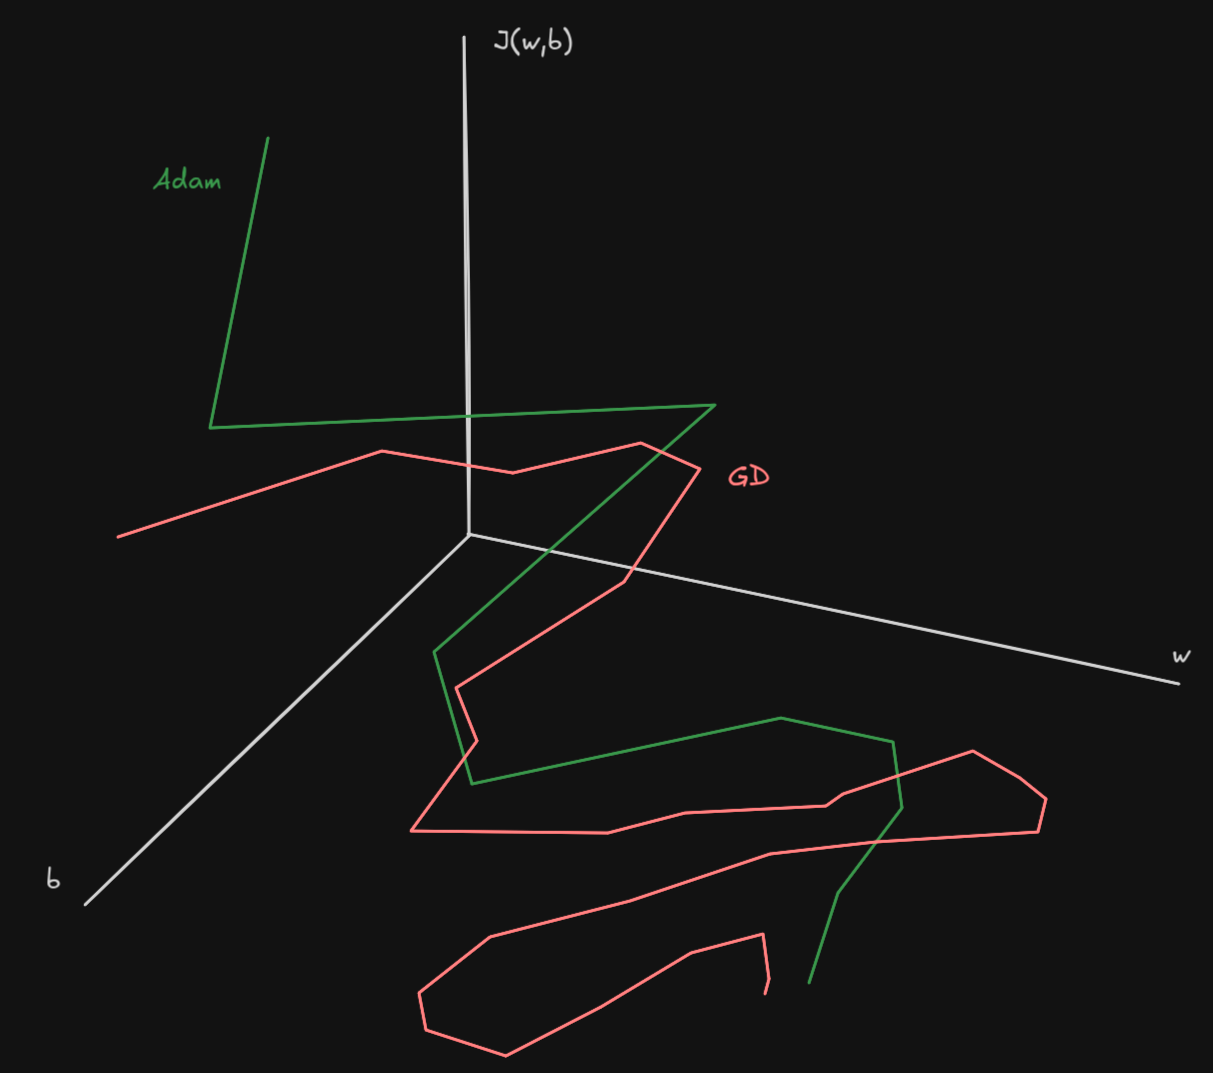

In [234]:
def cost_surface(x, y, w_range, b_range, resolution=50):
    # Generar una superficie de costos para visualizar el error cuadr√°tico medio
    W, B = np.meshgrid(
        np.linspace(*w_range, resolution),
        np.linspace(*b_range, resolution)
    )
    J = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            z = W[i, j] * x + B[i, j]
            y_hat = np.tanh(z)
            J[i, j] = np.mean((y_hat - y)**2)

    return W, B, J

In [235]:
def train_with_trajectory(neuron: SingleNeuron, optimizer: Optimizer, x: np.array, y: np.array, epochs=100):
    """
    Entrenamiento de la neurona, se entrena con el dataset completo en cada epoca ya que x, y son vectores.
    Adem√°s, se guarda la trayectoria de los pesos y bias.
    """
    losses = []
    trajectory = []

    for epoch in range(epochs):
        y_hat = neuron.forward(x)
        loss = neuron.compute_loss(y_hat, y)
        losses.append(loss)

        dw, db = neuron.backward(x, y)
        optimizer.step(neuron, dw, db)

        # Guardar la trayectoria de los pesos y bias para cada epoca
        trajectory.append((neuron.w, neuron.b))

    return losses, trajectory

In [236]:
def trajectory_bounds(trajectory_adam: List, trajectory_gd: List):
    """
    Obtener los l√≠mites de la trayectoria para graficar.
    """
    w_all = [w for w, _ in trajectory_gd + trajectory_adam]
    b_all = [b for _, b in trajectory_gd + trajectory_adam]

    print(f"Rango de w: {min(w_all):.2f} a {max(w_all):.2f}")
    print(f"Rango de b: {min(b_all):.2f} a {max(b_all):.2f}")

    # Agregar m√°rgenes para tener m√°s espacio en el plot
    w_margin = 0.01
    b_margin = 0.01

    # Establecer l√≠mites de la trayectoria
    w_range = (min(w_all) - w_margin, max(w_all) + w_margin)
    b_range = (min(b_all) - b_margin, max(b_all) + b_margin)

    return w_range, b_range

In [262]:
# Dataset
x, y = generate_dataset(n=100, ini=-3, fin=3, noise_std=0.1)

# Elegimos un learning rate
lr = 0.01

# Inicializar neurona con pesos aleatorios
neuron_gd = SingleNeuron()
w0, b0 = neuron_gd.w, neuron_gd.b

# GD
optimizer_gd = GradientDescentOptimizer(lr=lr)
_, trajectory_gd = train_with_trajectory(neuron_gd, optimizer_gd, x, y, epochs=100)

# Adam con mismos valores iniciales
neuron_adam = SingleNeuron()
neuron_adam.w, neuron_adam.b = w0, b0
optimizer_adam = AdamOptimizer(lr=lr)
_, trajectory_adam = train_with_trajectory(neuron_adam, optimizer_adam, x, y, epochs=100)

# Obtener l√≠mites de la trayectoria
w_range, b_range = trajectory_bounds(trajectory_adam, trajectory_gd)

# Superficie de la funci√≥n de costo
W, B, J = cost_surface(x, y, w_range=w_range, b_range=b_range, resolution=100)

# Separar trayectorias
# es una lista de tuplas (w_i, b_i)) y se genera una lista de cada uno
w_gd, b_gd = zip(*trajectory_gd)
w_adam, b_adam = zip(*trajectory_adam)

Rango de w: -0.71 a -0.17
Rango de b: 1.57 a 1.85


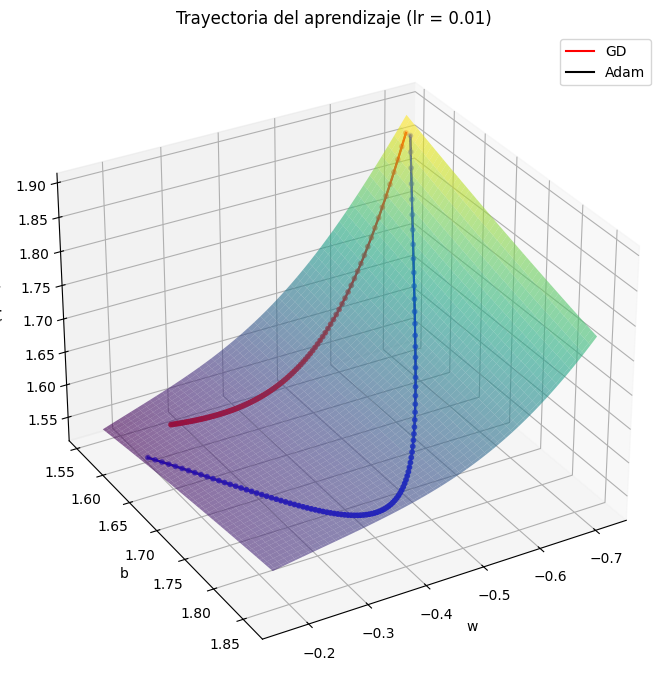

In [263]:
# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, cmap='viridis', alpha=0.6)

# Trayectorias
z_gd = [np.mean((np.tanh(w * x + b) - y)**2) for w, b in trajectory_gd]
z_adam = [np.mean((np.tanh(w * x + b) - y)**2) for w, b in trajectory_adam]

ax.plot(w_gd, b_gd, z_gd, color='red', label='GD')
ax.plot(w_adam, b_adam, z_adam, color='black', label='Adam')

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w, b)", labelpad=10)
ax.view_init(elev=30, azim=60)


ax.plot(w_gd, b_gd, z_gd, color="red")
ax.scatter(w_gd, b_gd, z_gd, color="red", s=10)

ax.plot(w_adam, b_adam, z_adam, color="blue")
ax.scatter(w_adam, b_adam, z_adam, color="blue", s=10)

ax.set_title(f"Trayectoria del aprendizaje (lr = {lr})")
ax.legend()

plt.tight_layout()
plt.show()

## **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene informaci√≥n sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cu√°nto un cliente est√° dispuesto a gastar en un producto en el futuro.


### 2a) EDA y preparaci√≥n del dataset (2 puntos)

#### Consigna

Realizar el an√°lisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificaci√≥n donde queremos averiguar si el cliente pertenece a una categor√≠a: "Casual" (gasta menos de 5000), "Gama media" (gasta entre 5000 y 10000), "Fiel" (gasta entre 10000 y 15000) o a "Premium" (gasta m√°s de 15000).

#### Desarrollo

En caso de que el dataset no se encuentre en el contexto de ejecuci√≥n de la notebook, por favor subirlo a la raiz para poder ejecutar esta secci√≥n.

In [264]:
df = pd.read_csv('dataset_black_sales.csv')
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [265]:
df[["User_ID", "Product_ID"]].nunique()

User_ID       5891
Product_ID    3631
dtype: int64

Solo se observan NULLs en las categorias 2 y 3. Hay 550k entradas en el dataset y un total de 12 features.

In [266]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Se observa que para un mismo Product_ID los valores de CAT 1|2|3 se repiten, por lo que son subcategorias del mismo Product_ID. Por eso es que no deberia sumar informaci√≥n extra Product_ID y se procede a dropear. Para completar los NaN en vez de reemplazar por 0 podria armarse una heuristica o imputar con un modelo. Sin embargo, dado que el foco del trabajo esta en las NN y sus optimizadores, se procede a poner a 0 todos los NaNs

In [267]:
df_filtrado = df[(df["Product_ID"] == 'P00248942')]
df_filtrado.head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
1     1000001  P00248942      F   0-17          10             A   
126   1000024  P00248942      F  26-35           7             A   
405   1000068  P00248942      M  18-25           4             A   
516   1000093  P00248942      M  26-35          17             B   
701   1000135  P00248942      M  18-25           4             C   
757   1000146  P00248942      F  36-45          20             B   
3479  1000560  P00248942      M  46-50          15             C   
4044  1000669  P00248942      M  26-35          17             B   
6479  1001051  P00248942      F  26-35           0             A   
7846  1001220  P00248942      M   0-17          10             A   

     Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                             2               0                   1   
126                           3               1                   1   
405                           0               0                   1   
516                           1               1                   1   
701                           1               1                   1   
757                           3               1                   1   
3479                          1               1                   1   
4044                          2               0                   1   
6479                          0               1                   1   
7846                          3               0                   1   

      Product_Category_2  Product_Category_3  Purchase  
1                    6.0                14.0     15200  
126                  6.0                14.0     15774  
405                  6.0                14.0     11429  
516                  6.0                14.0     11754  
701                  6.0                14.0     19146  
757                  6.0                14.0     15659  
3479                 6.0                14.0     19409  
4044                 6.0                14.0     15423  
6479                 6.0                14.0     19335  
7846                 6.0                14.0      8285

In [268]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

Agregamos variable target para problema de clasificaci√≥n. Adem√°s, agregamos metodo de imputacion que reemplaza NaNs en Product_Category_2 y 3 por el valor indicado por KNN por lo detectado anteriormente. Si bien se detecto una heuristica aparente en el paso anterior, se prefiere ir por el metodo estadistico ya que no se tiene informaci√≥n rigurosa que valide la suposici√≥n.

In [269]:
df["Product_Category_2"].fillna(0, inplace=True)
df["Product_Category_3"].fillna(0, inplace=True)

df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

<ipython-input-269-9eb1b3507f4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Product_Category_2"].fillna(0, inplace=True)
<ipython-input-269-9eb1b3507f4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [270]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [271]:
def clasificar_cliente(p: int) -> str:
    if p < 5000:
        return "Casual"
    elif p < 10000:
        return "Gama media"
    elif p < 15000:
        return "Fiel"
    else:
        return "Premium"

df["Segmento"] = df["Purchase"].apply(clasificar_cliente)

In [272]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase    Segmento  
0                   0                   0      8370  Gama media  
1                   6                  14     15200     Premium  
2                   0                   0      1422      Casual  
3                  14                   0      1057      Casual  
4                   0                   0      7969  Gama media

Vemos que la clases Premium Casual y Fiel estan practicamente balanceadas, no es el caso con Gama media. Se corrobora con el histograma por purchases usando los limites de la clase.

<Axes: title={'center': 'Distribuci√≥n de clases'}, xlabel='Segmento'>

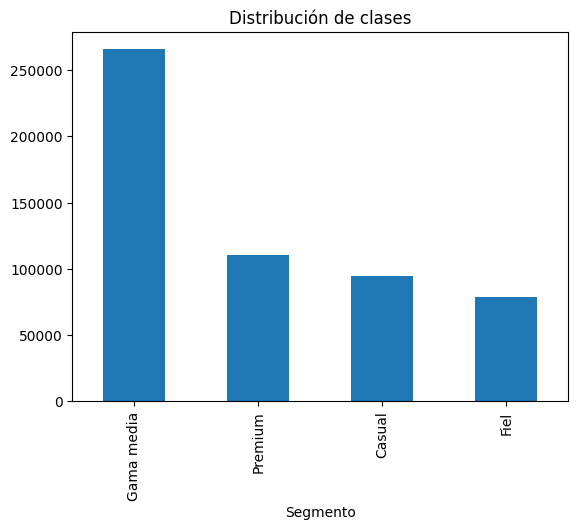

In [273]:
df["Segmento"].value_counts().plot(kind="bar", title="Distribuci√≥n de clases")

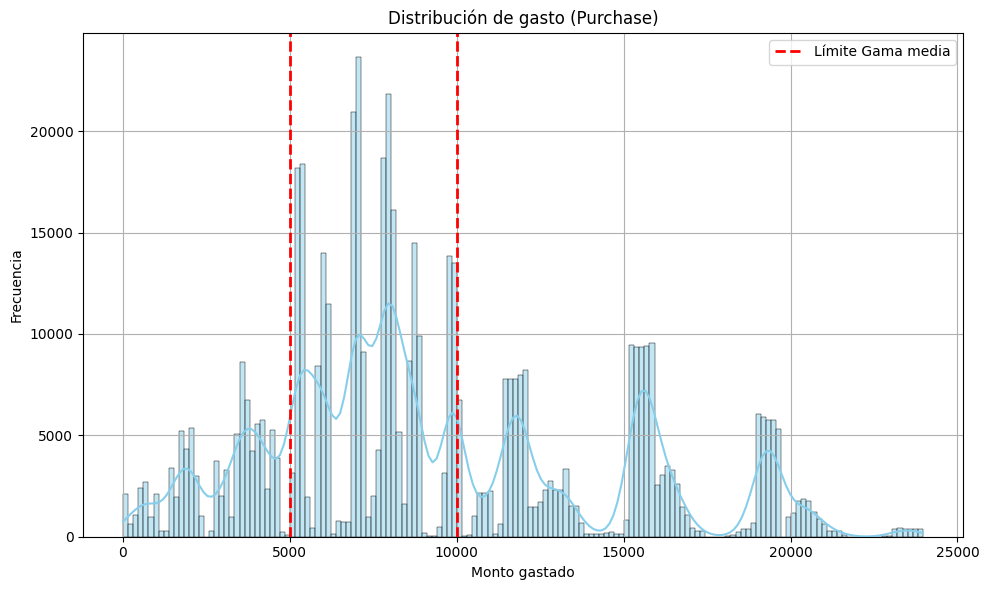

In [274]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Purchase"], kde=True, color="skyblue")

# L√≠neas rojas en 5000 y 10000
plt.axvline(5000, color="red", linestyle="--", linewidth=2, label="L√≠mite Gama media")
plt.axvline(10000, color="red", linestyle="--", linewidth=2)

plt.title("Distribuci√≥n de gasto (Purchase)")
plt.xlabel("Monto gastado")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Al hacer cruce entre categoricas y purchase no se ven cambios significativos entre las categorias. Se observa la mayor diferencia en el caso de city category con una media mas alta. Tal vez sean productos que no son tan sensibles a esas categoricas o lo son de manera sutil.

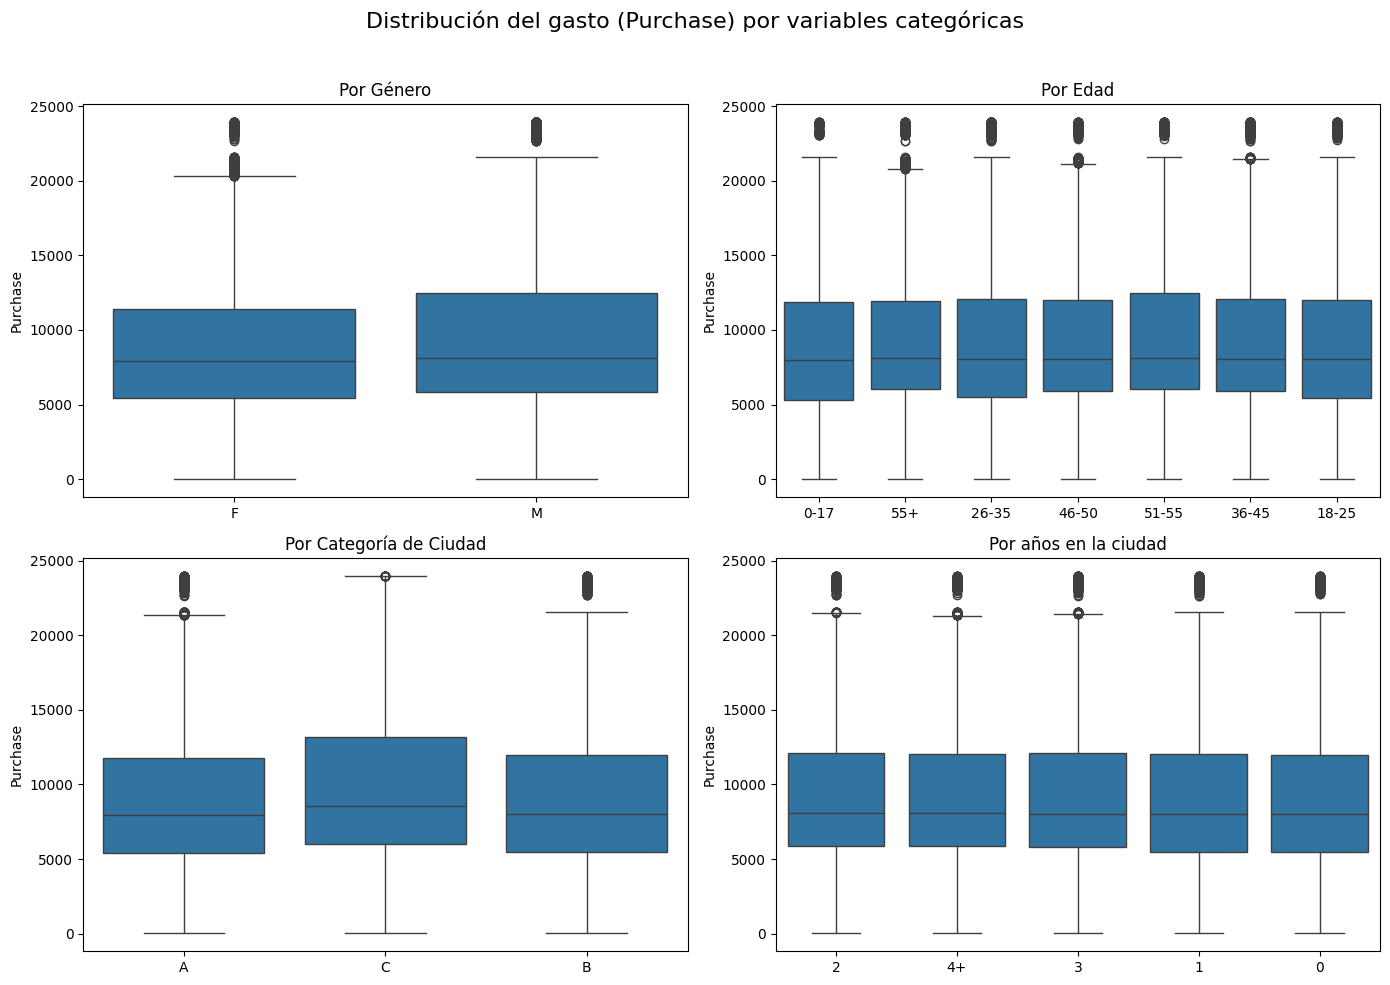

In [275]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribuci√≥n del gasto (Purchase) por variables categ√≥ricas", fontsize=16)

# Boxplot por G√©nero
sns.boxplot(x="Gender", y="Purchase", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Por G√©nero")

# Boxplot por Edad
sns.boxplot(x="Age", y="Purchase", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Por Edad")

# Boxplot por Categor√≠a de Ciudad
sns.boxplot(x="City_Category", y="Purchase", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Por Categor√≠a de Ciudad")

# Boxplot por a√±os en la ciudad
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Por a√±os en la ciudad")

# Ajustar distribuci√≥n
for ax in axs.flat:
    ax.set_xlabel("")
    ax.set_ylabel("Purchase")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [276]:
# One hot encoding, preparamos para entrenamiento en el punto siguiente
df = pd.get_dummies(df, columns=["Gender", "Age", "City_Category"], drop_first=True)

In [277]:
df.head()

User_ID Product_ID  Occupation Stay_In_Current_City_Years  Marital_Status  \
0  1000001  P00069042          10                          2               0   
1  1000001  P00248942          10                          2               0   
2  1000001  P00087842          10                          2               0   
3  1000001  P00085442          10                          2               0   
4  1000002  P00285442          16                         4+               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   
3                  12                  14                   0      1057   
4                   8                   0                   0      7969   

     Segmento  Gender_M  Age_18-25  Age_26-35  Age_36-45  Age_46-50  \
0  Gama media     False      False      False      False      False   
1     Premium     False      False      False      False      False   
2      Casual     False      False      False      False      False   
3      Casual     False      False      False      False      False   
4  Gama media      True      False      False      False      False   

   Age_51-55  Age_55+  City_Category_B  City_Category_C  
0      False    False            False            False  
1      False    False            False            False  
2      False    False            False            False  
3      False    False            False            False  
4      False     True            False             True

Pareciera que de las numericas, categoria 1 y 3 son las que tienen mayor correlaci√≥n en m√≥dulo con purchase

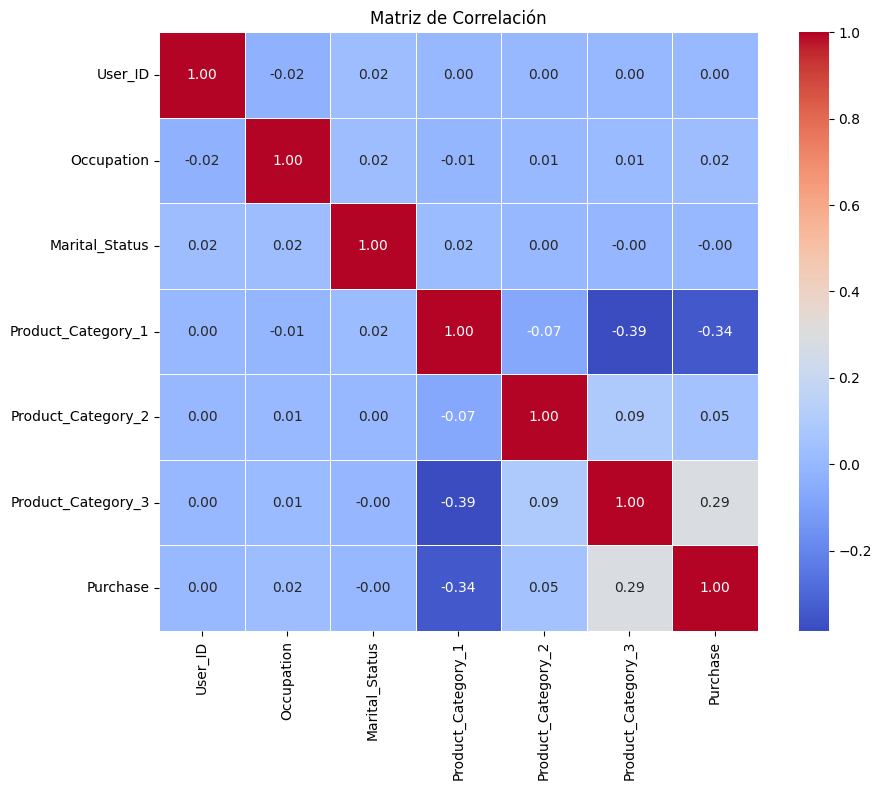

In [278]:
# Calcular la matriz de correlaci√≥n solo de columnas num√©ricas
corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            square=True)

plt.title("Matriz de Correlaci√≥n")
plt.tight_layout()
plt.show()

User_ID tiene correlacion 0 con purchase, por lo que al ser una categorica de alta cardinalidad sin valor para el target se dropea.

In [279]:
df_filtrado = df[(df["User_ID"] == 1000001)]
df_filtrado.head(2)

User_ID Product_ID  Occupation Stay_In_Current_City_Years  Marital_Status  \
0  1000001  P00069042          10                          2               0   
1  1000001  P00248942          10                          2               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   

     Segmento  Gender_M  Age_18-25  Age_26-35  Age_36-45  Age_46-50  \
0  Gama media     False      False      False      False      False   
1     Premium     False      False      False      False      False   

   Age_51-55  Age_55+  City_Category_B  City_Category_C  
0      False    False            False            False  
1      False    False            False            False

In [280]:
df.head()

User_ID Product_ID  Occupation Stay_In_Current_City_Years  Marital_Status  \
0  1000001  P00069042          10                          2               0   
1  1000001  P00248942          10                          2               0   
2  1000001  P00087842          10                          2               0   
3  1000001  P00085442          10                          2               0   
4  1000002  P00285442          16                         4+               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   
3                  12                  14                   0      1057   
4                   8                   0                   0      7969   

     Segmento  Gender_M  Age_18-25  Age_26-35  Age_36-45  Age_46-50  \
0  Gama media     False      False      False      False      False   
1     Premium     False      False      False      False      False   
2      Casual     False      False      False      False      False   
3      Casual     False      False      False      False      False   
4  Gama media      True      False      False      False      False   

   Age_51-55  Age_55+  City_Category_B  City_Category_C  
0      False    False            False            False  
1      False    False            False            False  
2      False    False            False            False  
3      False    False            False            False  
4      False     True            False             True

### 2b) Benchmark de modelos de ML cl√°sico  (1 punto)

#### Consigna

Definir uno o varios puntos de comparaci√≥n (benchmark) para comparar entre s√≠ al menos 2 modelos distintos. Estos deben ser modelos de ML cl√°sico de la librer√≠a `sklearn` de f√°cil y r√°pido entrenamiento.

#### Desarrollo

Vamos a usar regresi√≥n log√≠stica multiclase y support vector machines como modelos cl√°sicos para clasificar clases de usuarios por gastos.

In [281]:
df_original = df.copy()
df = df.drop(columns=["User_ID", "Product_ID"])

In [282]:
le = LabelEncoder()
df["Segmento_encoded"] = le.fit_transform(df["Segmento"])

In [283]:
# Hacemos One hot sobre Stay_In_Current_City_Years ya que tiene 4+ como categoria y la podemos pensar como no numerica
df = pd.get_dummies(df, columns=["Stay_In_Current_City_Years"], drop_first=True)

In [284]:
df.head()

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                   0   
1          10               0                   1                   6   
2          10               0                  12                   0   
3          10               0                  12                  14   
4          16               0                   8                   0   

   Product_Category_3  Purchase    Segmento  Gender_M  Age_18-25  Age_26-35  \
0                   0      8370  Gama media     False      False      False   
1                  14     15200     Premium     False      False      False   
2                   0      1422      Casual     False      False      False   
3                   0      1057      Casual     False      False      False   
4                   0      7969  Gama media      True      False      False   

   ...  Age_46-50  Age_51-55  Age_55+  City_Category_B  City_Category_C  \
0  ...      False      False    False            False            False   
1  ...      False      False    False            False            False   
2  ...      False      False    False            False            False   
3  ...      False      False    False            False            False   
4  ...      False      False     True            False             True   

   Segmento_encoded  Stay_In_Current_City_Years_1  \
0                 2                         False   
1                 3                         False   
2                 0                         False   
3                 0                         False   
4                 2                         False   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                          True                         False   
1                          True                         False   
2                          True                         False   
3                          True                         False   
4                         False                         False   

   Stay_In_Current_City_Years_4+  
0                          False  
1                          False  
2                          False  
3                          False  
4                           True  

[5 rows x 21 columns]

In [285]:
X = df.drop(columns=["Purchase", "Segmento", "Segmento_encoded"])
y = df["Segmento_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [286]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [287]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [288]:
def evaluar_modelo(modelo, nombre, X_test, y_test, clases):
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\nüìä Evaluaci√≥n: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nReporte por clase:")
    print(classification_report(y_test, y_pred, target_names=clases))

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_percent = np.round(cm * 100, 2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=clases, yticklabels=clases)
    plt.title(f"Matriz de Confusi√≥n (%) - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

    return {"Modelo": nombre, "Accuracy": acc, "F1_weighted": f1}


üìä Evaluaci√≥n: Random Forest
Accuracy: 0.6919
F1 Score (weighted): 0.6812

Reporte por clase:
              precision    recall  f1-score   support

  Gama media       0.72      0.46      0.56     18985
     Premium       0.43      0.35      0.38     15803
      Casual       0.78      0.85      0.82     53121
        Fiel       0.61      0.75      0.67     22105

    accuracy                           0.69    110014
   macro avg       0.64      0.60      0.61    110014
weighted avg       0.69      0.69      0.68    110014



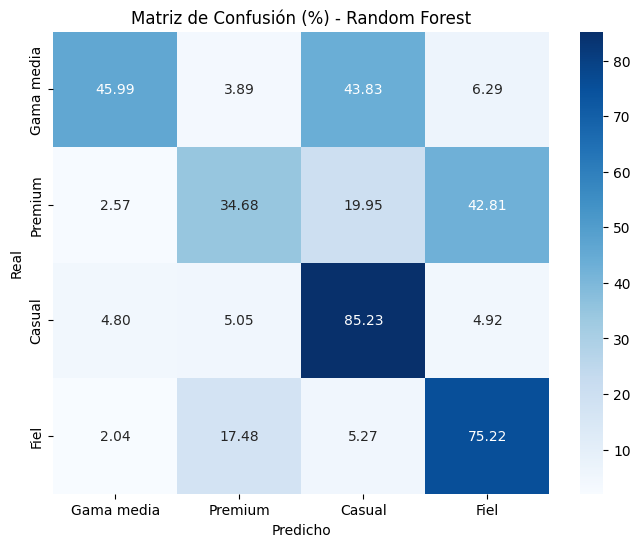


üìä Evaluaci√≥n: Regresi√≥n Log√≠stica
Accuracy: 0.5448
F1 Score (weighted): 0.4517

Reporte por clase:
              precision    recall  f1-score   support

  Gama media       0.64      0.09      0.16     18985
     Premium       0.08      0.00      0.00     15803
      Casual       0.56      0.93      0.70     53121
        Fiel       0.46      0.40      0.43     22105

    accuracy                           0.54    110014
   macro avg       0.43      0.36      0.32    110014
weighted avg       0.48      0.54      0.45    110014



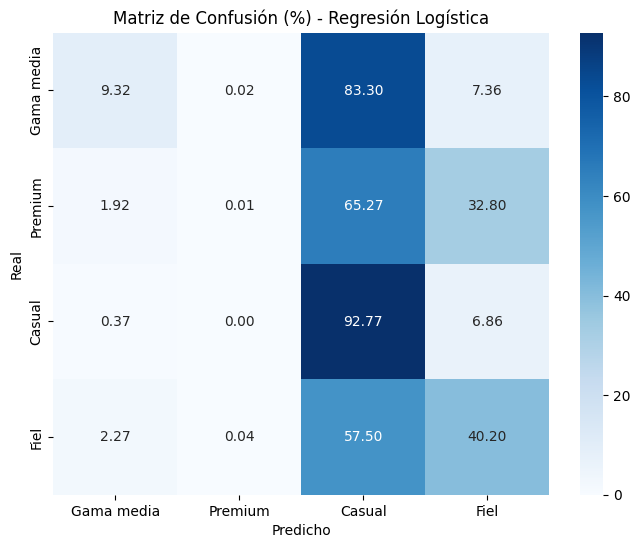

In [289]:
clases = df["Segmento"].unique()

resultados = []
resultados.append(evaluar_modelo(rf, "Random Forest", X_test, y_test, clases))
resultados.append(evaluar_modelo(lr, "Regresi√≥n Log√≠stica", X_test, y_test, clases))


In [290]:
pd.DataFrame(resultados).sort_values("F1_weighted", ascending=False)

Modelo  Accuracy  F1_weighted
0        Random Forest  0.691857     0.681239
1  Regresi√≥n Log√≠stica  0.544812     0.451673

### 2c) Modelo de deep leaning sin embeddings (1.5 puntos)

#### Consigna

Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones de la funci√≥n de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

#### Desarrollo

In [291]:
X = df.drop(columns=["Purchase", "Segmento", "Segmento_encoded"])
y = df["Segmento_encoded"]

Escalamos variables numericas y booleanas se pasan a 0's y 1's

In [292]:
X = X.astype(float)
num_cols = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0         0.294864             0.0           -0.610809           -1.083654   
1         0.294864             0.0           -1.118912           -0.118323   
2         0.294864             0.0            1.675656           -1.083654   
3         0.294864             0.0            1.675656            1.168785   
4         1.214734             0.0            0.659449           -1.083654   
...            ...             ...                 ...                 ...   
550063    0.754799             1.0            3.708069           -1.083654   
550064   -1.084943             0.0            3.708069           -1.083654   
550065    1.061423             1.0            3.708069           -1.083654   
550066   -1.084943             0.0            3.708069           -1.083654   
550067   -1.238255             1.0            3.708069           -1.083654   

        Product_Category_3  Gender_M  Age_18-25  Age_26-35  Age_36-45  \
0                -0.614641       0.0        0.0        0.0        0.0   
1                 1.625106       0.0        0.0        0.0        0.0   
2                -0.614641       0.0        0.0        0.0        0.0   
3                -0.614641       0.0        0.0        0.0        0.0   
4                -0.614641       1.0        0.0        0.0        0.0   
...                    ...       ...        ...        ...        ...   
550063           -0.614641       1.0        0.0        0.0        0.0   
550064           -0.614641       0.0        0.0        1.0        0.0   
550065           -0.614641       0.0        0.0        1.0        0.0   
550066           -0.614641       0.0        0.0        0.0        0.0   
550067           -0.614641       0.0        0.0        0.0        0.0   

        Age_46-50  Age_51-55  Age_55+  City_Category_B  City_Category_C  \
0             0.0        0.0      0.0              0.0              0.0   
1             0.0        0.0      0.0              0.0              0.0   
2             0.0        0.0      0.0              0.0              0.0   
3             0.0        0.0      0.0              0.0              0.0   
4             0.0        0.0      1.0              0.0              1.0   
...           ...        ...      ...              ...              ...   
550063        0.0        1.0      0.0              1.0              0.0   
550064        0.0        0.0      0.0              0.0              1.0   
550065        0.0        0.0      0.0              1.0              0.0   
550066        0.0        0.0      1.0              0.0              1.0   
550067        1.0        0.0      0.0              1.0              0.0   

        Stay_In_Current_City_Years_1  Stay_In_Current_City_Years_2  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           1.0   
3                                0.0                           1.0   
4                                0.0                           0.0   
...                              ...                           ...   
550063                           1.0                           0.0   
550064                           0.0                           0.0   
550065                           0.0                           0.0   
550066                           0.0                           1.0   
550067                           0.0                           0.0   

        Stay_In_Current_City_Years_3  Stay_In_Current_City_Years_4+  
0                                0.0                            0.0  
1                                0.0                            0.0  
2                                0.0                            0.0  
3                                0.0                            0.0  
4                                0.0                            1.0  
...                             

In [293]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Se escalan features numericas para NN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [294]:
# Convertir a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).to(device)

# Datasets
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
val_ds = TensorDataset(X_val_tensor, y_val_tensor)

# Loaders
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64)

Se decide comenzar con una red peque√±a con 2 capas ocultas de dimensiones 64 y 32.

In [295]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

In [296]:
# model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y)))
model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y))).to(device) # GPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss() # clasificacion

train_loss_hist, val_loss_hist, val_acc_hist = [], [], []

for epoch in range(30):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_loss_hist.append(epoch_loss / len(train_dl))

    # Validaci√≥n
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
            out = model(xb)
            val_loss += criterion(out, yb).item()
            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_loss_hist.append(val_loss / len(val_dl))
    val_acc_hist.append(correct / total)

    print(f"üìç Epoch {epoch+1:2d} | Train Loss: {train_loss_hist[-1]:.4f} | Val Loss: {val_loss_hist[-1]:.4f} | Val Acc: {val_acc_hist[-1]:.4f}")

üìç Epoch  1 | Train Loss: 0.9310 | Val Loss: 0.8220 | Val Acc: 0.6721
üìç Epoch  2 | Train Loss: 0.7850 | Val Loss: 0.7775 | Val Acc: 0.6943
üìç Epoch  3 | Train Loss: 0.7664 | Val Loss: 0.7674 | Val Acc: 0.7002
üìç Epoch  4 | Train Loss: 0.7609 | Val Loss: 0.7566 | Val Acc: 0.7010
üìç Epoch  5 | Train Loss: 0.7549 | Val Loss: 0.7614 | Val Acc: 0.7035
üìç Epoch  6 | Train Loss: 0.7482 | Val Loss: 0.7496 | Val Acc: 0.7040
üìç Epoch  7 | Train Loss: 0.7425 | Val Loss: 0.7434 | Val Acc: 0.7075
üìç Epoch  8 | Train Loss: 0.7391 | Val Loss: 0.7363 | Val Acc: 0.7086
üìç Epoch  9 | Train Loss: 0.7356 | Val Loss: 0.7347 | Val Acc: 0.7061
üìç Epoch 10 | Train Loss: 0.7330 | Val Loss: 0.7346 | Val Acc: 0.7090
üìç Epoch 11 | Train Loss: 0.7307 | Val Loss: 0.7281 | Val Acc: 0.7085
üìç Epoch 12 | Train Loss: 0.7286 | Val Loss: 0.7310 | Val Acc: 0.7041
üìç Epoch 13 | Train Loss: 0.7272 | Val Loss: 0.7254 | Val Acc: 0.7085
üìç Epoch 14 | Train Loss: 0.7255 | Val Loss: 0.7337 | Val Acc:

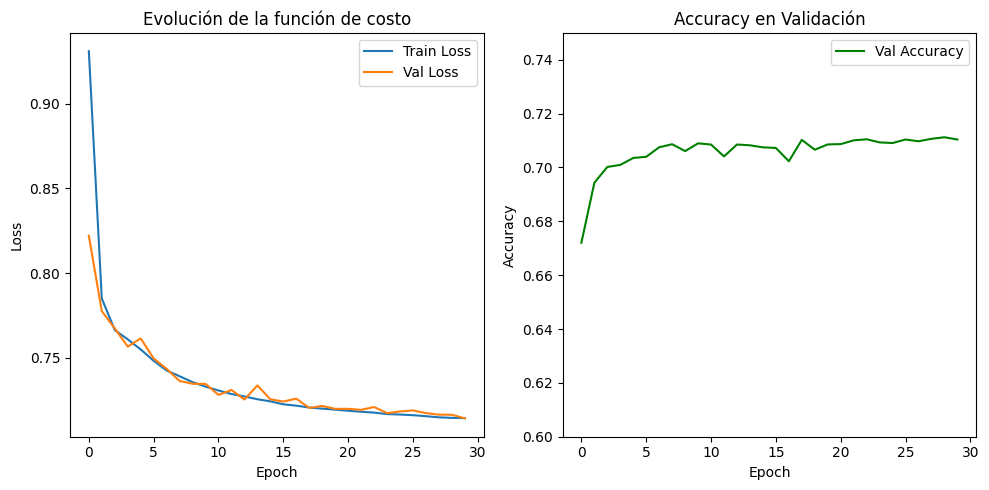

üìä Accuracy promedio en validaci√≥n: 0.7059
üèÜ Mejor accuracy en validaci√≥n: 0.7112


In [297]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evoluci√≥n de la funci√≥n de costo")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc_hist, label="Val Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.75)
plt.title("Accuracy en Validaci√≥n")
plt.legend()

plt.tight_layout()
plt.show()

avg_val_acc = sum(val_acc_hist) / len(val_acc_hist)
print(f"üìä Accuracy promedio en validaci√≥n: {avg_val_acc:.4f}")

best_val_acc = max(val_acc_hist)
print(f"üèÜ Mejor accuracy en validaci√≥n: {best_val_acc:.4f}")

Pareciera que train loss queda en niveles altos, se prueba aumentando la complejidad de la red para entender si podemos absorber patrones mas complejos que nos permitan mejorar la performance sobre el dataset. El Accuracy es alto seguramente debido a que las labels correctan se eligen pero con poca certeza y CrossEntropy castiga eso con alta loss. Tambien se probara aumentando batch_size, un valor bajo puede no ayudar a la convergencia y las epocas de 30 a 50

In [298]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.out(x)

In [299]:
# Loaders
train_dl = DataLoader(train_ds, batch_size=512, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=512)

# model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y)))
model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y))).to(device) # GPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss() # clasificacion

train_loss_hist, val_loss_hist, val_acc_hist = [], [], []

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_loss_hist.append(epoch_loss / len(train_dl))

    # Validaci√≥n
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
            out = model(xb)
            val_loss += criterion(out, yb).item()
            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_loss_hist.append(val_loss / len(val_dl))
    val_acc_hist.append(correct / total)

    print(f"üìç Epoch {epoch+1:2d} | Train Loss: {train_loss_hist[-1]:.4f} | Val Loss: {val_loss_hist[-1]:.4f} | Val Acc: {val_acc_hist[-1]:.4f}")

üìç Epoch  1 | Train Loss: 0.8073 | Val Loss: 0.7584 | Val Acc: 0.7032
üìç Epoch  2 | Train Loss: 0.7400 | Val Loss: 0.7417 | Val Acc: 0.7070
üìç Epoch  3 | Train Loss: 0.7317 | Val Loss: 0.7316 | Val Acc: 0.7069
üìç Epoch  4 | Train Loss: 0.7283 | Val Loss: 0.7386 | Val Acc: 0.6964
üìç Epoch  5 | Train Loss: 0.7285 | Val Loss: 0.7273 | Val Acc: 0.7085
üìç Epoch  6 | Train Loss: 0.7264 | Val Loss: 0.7260 | Val Acc: 0.7019
üìç Epoch  7 | Train Loss: 0.7253 | Val Loss: 0.7326 | Val Acc: 0.7050
üìç Epoch  8 | Train Loss: 0.7266 | Val Loss: 0.7248 | Val Acc: 0.7091
üìç Epoch  9 | Train Loss: 0.7231 | Val Loss: 0.7255 | Val Acc: 0.7066
üìç Epoch 10 | Train Loss: 0.7225 | Val Loss: 0.7385 | Val Acc: 0.7067
üìç Epoch 11 | Train Loss: 0.7235 | Val Loss: 0.7227 | Val Acc: 0.7078
üìç Epoch 12 | Train Loss: 0.7217 | Val Loss: 0.7332 | Val Acc: 0.7022
üìç Epoch 13 | Train Loss: 0.7225 | Val Loss: 0.7396 | Val Acc: 0.7067
üìç Epoch 14 | Train Loss: 0.7216 | Val Loss: 0.7202 | Val Acc:

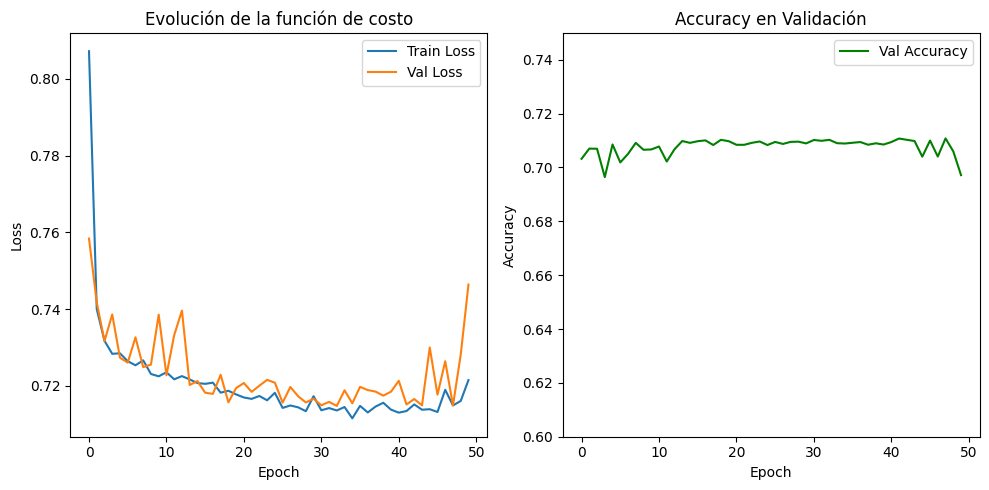

üìä Accuracy promedio en validaci√≥n: 0.7078
üèÜ Mejor accuracy en validaci√≥n: 0.7108


In [300]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evoluci√≥n de la funci√≥n de costo")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc_hist, label="Val Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.75)
plt.title("Accuracy en Validaci√≥n")
plt.legend()

plt.tight_layout()
plt.show()

avg_val_acc = sum(val_acc_hist) / len(val_acc_hist)
print(f"üìä Accuracy promedio en validaci√≥n: {avg_val_acc:.4f}")

best_val_acc = max(val_acc_hist)
print(f"üèÜ Mejor accuracy en validaci√≥n: {best_val_acc:.4f}")

No se observan mejoras significativas al complejizar la red, incluso indicios de overfitting. Al no ser un dataset tan complejo, se intuye que falten se√±ales lo suficientemente fuertes en los datos como para mejorar el aprendizaje de los modelos utilizados.

Se podria implementar dropout y tecnicas de regularizacion para ver si mejora.

In [301]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, dropout=0.3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        return self.out(x)

In [302]:
# Loaders
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256)

# model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y)))
model = SimpleNN(input_dim=X_train.shape[1], output_dim=len(set(y)), dropout=0.3).to(device)  # con dropout
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss() # clasificacion

train_loss_hist, val_loss_hist, val_acc_hist = [], [], []

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_loss_hist.append(epoch_loss / len(train_dl))

    # Validaci√≥n
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device) # los pasamos a GPU
            out = model(xb)
            val_loss += criterion(out, yb).item()
            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_loss_hist.append(val_loss / len(val_dl))
    val_acc_hist.append(correct / total)

    print(f"üìç Epoch {epoch+1:2d} | Train Loss: {train_loss_hist[-1]:.4f} | Val Loss: {val_loss_hist[-1]:.4f} | Val Acc: {val_acc_hist[-1]:.4f}")

üìç Epoch  1 | Train Loss: 0.9236 | Val Loss: 0.8165 | Val Acc: 0.6736
üìç Epoch  2 | Train Loss: 0.8463 | Val Loss: 0.7772 | Val Acc: 0.6863
üìç Epoch  3 | Train Loss: 0.8291 | Val Loss: 0.7808 | Val Acc: 0.6923
üìç Epoch  4 | Train Loss: 0.8221 | Val Loss: 0.7696 | Val Acc: 0.6935
üìç Epoch  5 | Train Loss: 0.8202 | Val Loss: 0.7804 | Val Acc: 0.6900
üìç Epoch  6 | Train Loss: 0.8190 | Val Loss: 0.7742 | Val Acc: 0.6847
üìç Epoch  7 | Train Loss: 0.8123 | Val Loss: 0.7634 | Val Acc: 0.6975
üìç Epoch  8 | Train Loss: 0.8098 | Val Loss: 0.7592 | Val Acc: 0.6957
üìç Epoch  9 | Train Loss: 0.8075 | Val Loss: 0.7635 | Val Acc: 0.6974
üìç Epoch 10 | Train Loss: 0.8082 | Val Loss: 0.7538 | Val Acc: 0.6976
üìç Epoch 11 | Train Loss: 0.8053 | Val Loss: 0.7766 | Val Acc: 0.6891
üìç Epoch 12 | Train Loss: 0.8010 | Val Loss: 0.7533 | Val Acc: 0.6959
üìç Epoch 13 | Train Loss: 0.8047 | Val Loss: 0.7680 | Val Acc: 0.6923
üìç Epoch 14 | Train Loss: 0.8005 | Val Loss: 0.7723 | Val Acc:

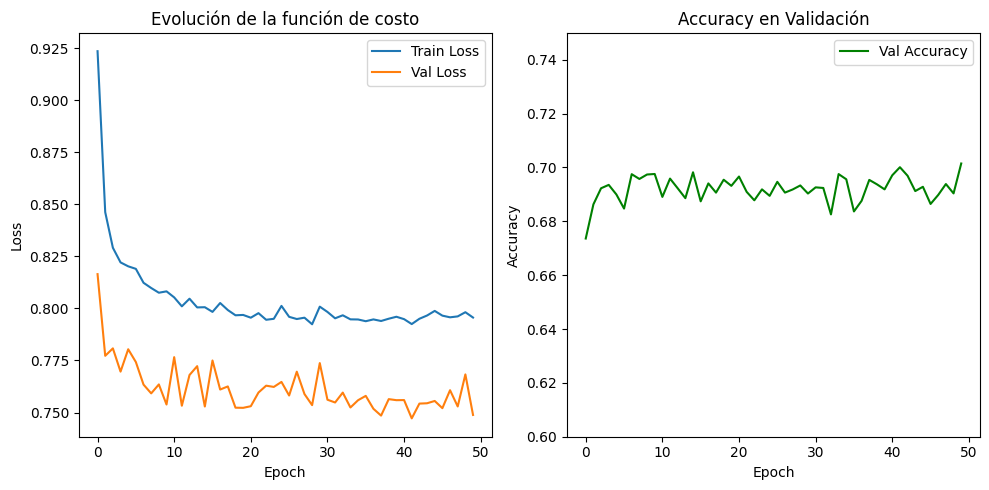

üìä Accuracy promedio en validaci√≥n: 0.6921
üèÜ Mejor accuracy en validaci√≥n: 0.7015


In [303]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evoluci√≥n de la funci√≥n de costo")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc_hist, label="Val Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.75)
plt.title("Accuracy en Validaci√≥n")
plt.legend()

plt.tight_layout()
plt.show()

avg_val_acc = sum(val_acc_hist) / len(val_acc_hist)
print(f"üìä Accuracy promedio en validaci√≥n: {avg_val_acc:.4f}")

best_val_acc = max(val_acc_hist)
print(f"üèÜ Mejor accuracy en validaci√≥n: {best_val_acc:.4f}")

Se podr√≠a hacer una busqueda de hyperparametros mas exhaustiva para regularizaci√≥n, dropout no mejora en este caso por lo que habria que probar otros valores, mas epochs, y tambien considerar weight decay.

En conclusi√≥n, si comparamos rendimientos con modelos clasicos como Random Forest (\~68% ACC), no se observaron grandes beneficios en este caso (\~71%). Aplicar modelos mas complejos y no tener mejores resultados podria explicarse por falta de se√±ales en el dataset.

### 2d) Modelo de deep leaning con embeddings (2 puntos)

#### Consigna

Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funci√≥n de costo y la m√©trica de validaci√≥n. Explicar el proceso de iteraci√≥n utilizado para conseguir los resultados y justificar los resultados obtenidos. **Comparar contra el modelo sin embeddings**.
Recordar que tanto para el punto 2c) como el 2d) pueden usarse herramientas como regularizaci√≥n y prueba de hiperpametros para conseguir mejores resultados.

#### Desarrollo

In [304]:
df["User_ID"] = df_original["User_ID"]
df["Product_ID"] = df_original["Product_ID"]

user_encoder = LabelEncoder()
df["user_id_encoded"] = user_encoder.fit_transform(df["User_ID"])
product_encoder = LabelEncoder()
df["product_id_encoded"] = product_encoder.fit_transform(df["Product_ID"])

df.head()


Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                   0   
1          10               0                   1                   6   
2          10               0                  12                   0   
3          10               0                  12                  14   
4          16               0                   8                   0   

   Product_Category_3  Purchase    Segmento  Gender_M  Age_18-25  Age_26-35  \
0                   0      8370  Gama media     False      False      False   
1                  14     15200     Premium     False      False      False   
2                   0      1422      Casual     False      False      False   
3                   0      1057      Casual     False      False      False   
4                   0      7969  Gama media      True      False      False   

   ...  City_Category_C  Segmento_encoded  Stay_In_Current_City_Years_1  \
0  ...            False                 2                         False   
1  ...            False                 3                         False   
2  ...            False                 0                         False   
3  ...            False                 0                         False   
4  ...             True                 2                         False   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                          True                         False   
1                          True                         False   
2                          True                         False   
3                          True                         False   
4                         False                         False   

   Stay_In_Current_City_Years_4+  User_ID  Product_ID  user_id_encoded  \
0                          False  1000001   P00069042                0   
1                          False  1000001   P00248942                0   
2                          False  1000001   P00087842                0   
3                          False  1000001   P00085442                0   
4                           True  1000002   P00285442                1   

   product_id_encoded  
0                 672  
1                2376  
2                 852  
3                 828  
4                2734  

[5 rows x 25 columns]

In [305]:
# dropeamos user id y column id ya que fueron codificadas y no seran utilizadas
df = df.drop(columns=["User_ID", "Product_ID"])

In [306]:
# Cantidad de usuarios √∫nicos y productos √∫nicos
n_users = df["user_id_encoded"].nunique()
n_products = df["product_id_encoded"].nunique()

# Dimensi√≥n de entrada para las otras features (no embeddings)
embedding_features = ["user_id_encoded", "product_id_encoded"]

# Variables para embeddings
user_ids = df["user_id_encoded"].values
product_ids = df["product_id_encoded"].values

# Resto de las features
X_numeric = df.drop(columns=["Purchase", "Segmento", "Segmento_encoded", "user_id_encoded", "product_id_encoded"]).astype(float).values

# Etiquetas
y = df["Segmento_encoded"].values

In [307]:
user_train, user_val, prod_train, prod_val, X_train, X_val, y_train, y_val = train_test_split(
    user_ids, product_ids, X_numeric, y, test_size=0.2, stratify=y, random_state=42
)

In [308]:
# Checkeamos GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tensores
user_train_tensor = torch.tensor(user_train, dtype=torch.long)
prod_train_tensor = torch.tensor(prod_train, dtype=torch.long)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

user_val_tensor = torch.tensor(user_val, dtype=torch.long)
prod_val_tensor = torch.tensor(prod_val, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

In [309]:
# Datasets
train_ds = TensorDataset(user_train_tensor, prod_train_tensor, X_train_tensor, y_train_tensor)
val_ds = TensorDataset(user_val_tensor, prod_val_tensor, X_val_tensor, y_val_tensor)

# Loaders
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256)

In [310]:
class EmbeddingMLP(nn.Module):
    def __init__(self, n_users, n_products, n_features, emb_dim=8, hidden_dims=(256, 128), dropout=0.0, n_classes=4):
        super().__init__()

        self.user_emb = nn.Embedding(n_users, emb_dim)
        self.prod_emb = nn.Embedding(n_products, emb_dim)

        total_input_dim = n_features + 2 * emb_dim

        self.mlp = nn.Sequential(
            nn.Linear(total_input_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(hidden_dims[1], n_classes)
        )

    def forward(self, user_id, product_id, x_numeric):
        u = self.user_emb(user_id)
        p = self.prod_emb(product_id)
        x = torch.cat([x_numeric, u, p], dim=1)
        return self.mlp(x)

Tomando experiencias pasadas, se utilizara un dropout mas bajo, weight decay, y un batch size de 256. La dimension de los embeddings sera 8.

In [311]:
# Instanciar el modelo
model = EmbeddingMLP(
    n_users=n_users,
    n_products=n_products,
    n_features=X_numeric.shape[1],  # columnas que no son embeddings
    emb_dim=8,
    hidden_dims=(256, 128),
    dropout=0.1,
    n_classes=4
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)

train_loss_hist, val_loss_hist, val_acc_hist = [], [], []

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for user_id, product_id, x_num, yb in train_dl:
        # a GPU
        user_id = user_id.to(device)
        product_id = product_id.to(device)
        x_num = x_num.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        pred = model(user_id, product_id, x_num)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_loss_hist.append(epoch_loss / len(train_dl))

    # Validaci√≥n
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for user_id, product_id, x_num, yb in val_dl:
            # a GPU
            user_id = user_id.to(device)
            product_id = product_id.to(device)
            x_num = x_num.to(device)
            yb = yb.to(device)

            out = model(user_id, product_id, x_num)
            val_loss += criterion(out, yb).item()
            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_loss_hist.append(val_loss / len(val_dl))
    val_acc_hist.append(correct / total)

    print(f"üìç Epoch {epoch+1:2d} | Train Loss: {train_loss_hist[-1]:.4f} | Val Loss: {val_loss_hist[-1]:.4f} | Val Acc: {val_acc_hist[-1]:.4f}")

üìç Epoch  1 | Train Loss: 0.7094 | Val Loss: 0.6503 | Val Acc: 0.7313
üìç Epoch  2 | Train Loss: 0.6497 | Val Loss: 0.6356 | Val Acc: 0.7370
üìç Epoch  3 | Train Loss: 0.6445 | Val Loss: 0.6360 | Val Acc: 0.7361
üìç Epoch  4 | Train Loss: 0.6422 | Val Loss: 0.6343 | Val Acc: 0.7363
üìç Epoch  5 | Train Loss: 0.6416 | Val Loss: 0.6371 | Val Acc: 0.7364
üìç Epoch  6 | Train Loss: 0.6401 | Val Loss: 0.6397 | Val Acc: 0.7345
üìç Epoch  7 | Train Loss: 0.6389 | Val Loss: 0.6306 | Val Acc: 0.7391
üìç Epoch  8 | Train Loss: 0.6387 | Val Loss: 0.6362 | Val Acc: 0.7356
üìç Epoch  9 | Train Loss: 0.6385 | Val Loss: 0.6491 | Val Acc: 0.7311
üìç Epoch 10 | Train Loss: 0.6387 | Val Loss: 0.6395 | Val Acc: 0.7339
üìç Epoch 11 | Train Loss: 0.6379 | Val Loss: 0.6393 | Val Acc: 0.7356
üìç Epoch 12 | Train Loss: 0.6388 | Val Loss: 0.6425 | Val Acc: 0.7345
üìç Epoch 13 | Train Loss: 0.6382 | Val Loss: 0.6324 | Val Acc: 0.7369
üìç Epoch 14 | Train Loss: 0.6387 | Val Loss: 0.6344 | Val Acc:

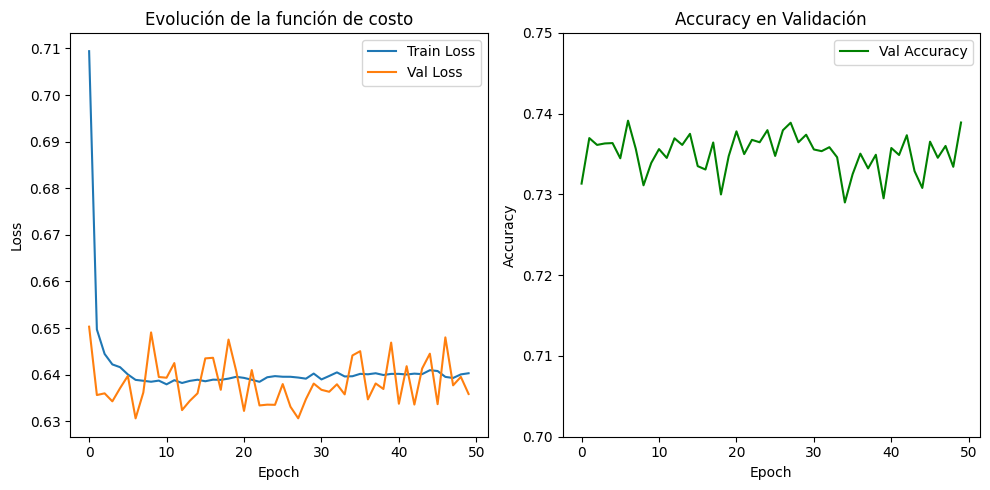

üìä Accuracy promedio en validaci√≥n: 0.7351
üèÜ Mejor accuracy en validaci√≥n: 0.7391


In [312]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evoluci√≥n de la funci√≥n de costo")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc_hist, label="Val Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.75)
plt.title("Accuracy en Validaci√≥n")
plt.legend()

plt.tight_layout()
plt.show()

avg_val_acc = sum(val_acc_hist) / len(val_acc_hist)
print(f"üìä Accuracy promedio en validaci√≥n: {avg_val_acc:.4f}")

best_val_acc = max(val_acc_hist)
print(f"üèÜ Mejor accuracy en validaci√≥n: {best_val_acc:.4f}")

Vemos una mejora de 3% aproximadamente respecto de las redes NN sin embeddings y una mejora de 5% respecto de modelos clasicos. Otra vez, evidentemente habia se√±ales o patrones que absorber de Product_ID y User_ID

### 2e) Encontrar usuarios similares (0.5 puntos)

#### Consigna

Para el modelo del punto 2c) implementar una funci√≥n que a reciba un id de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar.

#### Desarrollo

Entiendo que la consigna esta mal y se esta pidiendo utilizar los embeddings del punto d.

Durante el entrenamiento, el modelo asigna a cada user_id un vector num√©rico (embedding) en un espacio latente. Este vector captura informaci√≥n impl√≠cita sobre el comportamiento de compra del usuario.

Esto nos permite, por ejemplo, dado un user_id, encontrar otros usuarios que tienen vectores de embeddings muy parecidos. Es decir, usuarios con patrones de compra similares.

Usamos la metrica similitud coseno que es 1 - distancia coseno. La similitud es proporcional al coseno entre los vectores, mientras mas grande el coseno menor el angulo entre ellos (mas similares).

En el ejemplo de la figura:

    user_id = 1000 y user_id = 1001 tienen un √°ngulo m√°s grande ‚Üí menor similitud coseno.

    user_id = 1000 y user_id = 500 tienen un √°ngulo chico ‚Üí mayor similitud coseno.

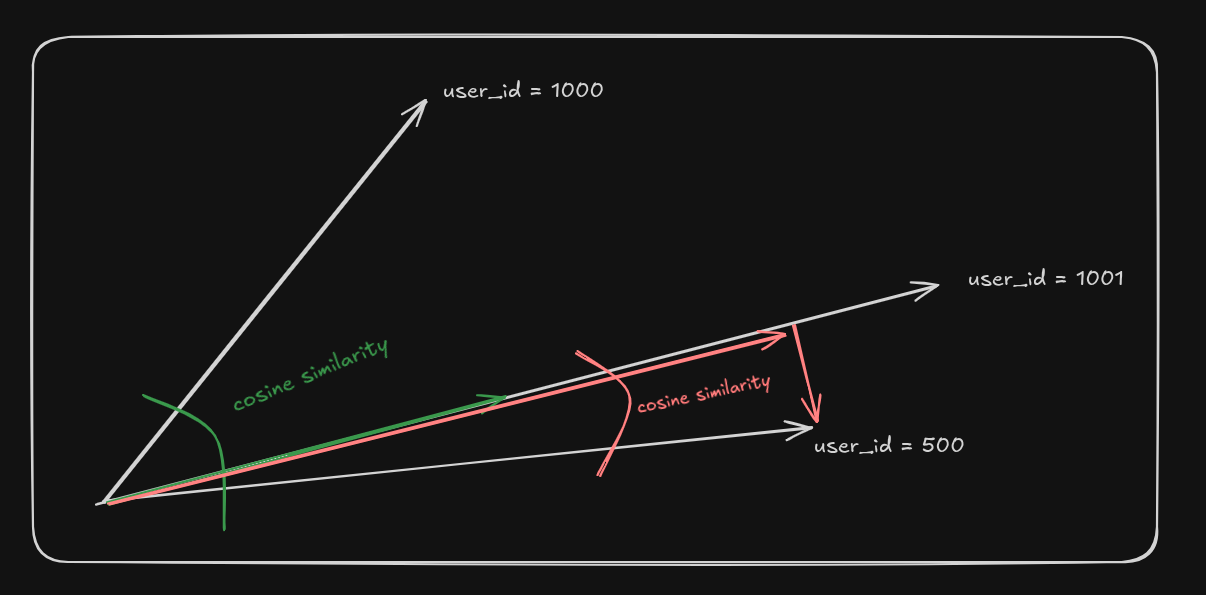

Usamos el id ya codificado

In [335]:
df['user_id_encoded'].head(10)

0    0
1    0
2    0
3    0
4    1
5    2
6    3
7    3
8    3
9    4
Name: user_id_encoded, dtype: int64

In [322]:
# Para un usuario espec√≠fico (por ejemplo, user_id codificado = 42)
user_vec = model.user_emb.weight.data[3]
print(user_vec.shape)
print(user_vec)

torch.Size([8])
tensor([-7.8502e-06, -1.1636e-04,  4.2155e-05, -1.0724e-01,  3.8180e-07,
        -1.4309e-05, -9.5784e-06,  3.1651e-02], device='cuda:0')


In [323]:
# Obtener los vectores embebidos de todos los usuarios
user_embeddings = model.user_emb.weight.data.cpu().numpy() # lo pasamos a cpu para procesar luego

In [324]:
def encontrar_usuarios_similares(user_id, model, n=5):
    """
    Encuentra los n usuarios m√°s similares al user_id (codificado).
    """
    # Extraer todos los embeddings de usuarios
    user_embs = model.user_emb.weight.data.cpu().numpy()

    # Extraer el embedding del usuario target
    target_vec = user_embs[user_id].reshape(1, -1)

    # Calcular similitud de coseno = 1 - dist_cosine()
    sims = cosine_similarity(target_vec, user_embs)[0]

    # Ordenar de mayor a menor, excluyendo el mismo usuario
    similares = sims.argsort()[::-1]
    similares = [i for i in similares if i != user_id][:n]

    return similares

Vamos a usar distancia coseno, ya que los modelos de embeddings fueron entrenados para crear los vectores de usuarios segun similaridades en un espacio de 8 dimensiones.

In [326]:
encontrar_usuarios_similares(3, model)

[np.int64(3043), np.int64(1425), np.int64(1690), np.int64(8), np.int64(4128)]